In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Load data from csv file
data = pd.read_csv('vn_selected.csv')
data_vn = data.copy()
data_vn.head()

,Date,Ticker,Low,Open,Volume,High,Close,AdjustedClose
0,2001-01-03,HAP,1389.0,1389.0,8300,1389.0,1389.0,NaN
1,2001-01-05,HAP,1416.0,1416.0,900,1416.0,1416.0,NaN
2,2001-01-08,HAP,1444.0,1444.0,11000,1444.0,1444.0,NaN
3,2001-01-10,HAP,1471.0,1471.0,27300,1471.0,1471.0,NaN
4,2001-01-12,HAP,1444.0,1444.0,14700,1444.0,1444.0,NaN


In [3]:
data_vn = data_vn.copy()
data_vn.drop(columns=['AdjustedClose'], inplace=True)
data_vn.head()

,Date,Ticker,Low,Open,Volume,High,Close
0,2001-01-03,HAP,1389.0,1389.0,8300,1389.0,1389.0
1,2001-01-05,HAP,1416.0,1416.0,900,1416.0,1416.0
2,2001-01-08,HAP,1444.0,1444.0,11000,1444.0,1444.0
3,2001-01-10,HAP,1471.0,1471.0,27300,1471.0,1471.0
4,2001-01-12,HAP,1444.0,1444.0,14700,1444.0,1444.0


In [4]:
data_vn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5399 entries, 0 to 5398
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5399 non-null   object 
 1   Ticker  5399 non-null   object 
 2   Low     5399 non-null   float64
 3   Open    5399 non-null   float64
 4   Volume  5399 non-null   int64  
 5   High    5399 non-null   float64
 6   Close   5399 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 295.4+ KB


In [5]:
data_vn.isna().sum()

,0
Date,0
Ticker,0
Low,0
Open,0
Volume,0
High,0
Close,0


In [6]:
data_vn.describe()

,Low,Open,Volume,High,Close
count,5399.000000,5399.000000,5.399000e+03,5399.000000,5399.000000
mean,4193.105760,4238.025931,2.169637e+05,4314.890165,4258.602519
std,3279.012698,3307.237879,4.583905e+05,3394.186660,3342.203420
min,1007.000000,1007.000000,0.000000e+00,1039.000000,1007.000000
25%,2240.500000,2278.000000,1.339500e+04,2291.000000,2278.000000
50%,2826.000000,2857.000000,7.051000e+04,2910.000000,2876.000000
75%,4827.000000,4906.500000,2.311100e+05,5000.500000,4903.000000
max,19378.000000,19378.000000,8.716800e+06,19380.000000,19378.000000


In [7]:
data_vn.iloc[:, 1:5]

,Ticker,Low,Open,Volume
0,HAP,1389.0,1389.0,8300
1,HAP,1416.0,1416.0,900
2,HAP,1444.0,1444.0,11000
3,HAP,1471.0,1471.0,27300
4,HAP,1444.0,1444.0,14700
...,...,...,...,...
5394,HAP,4100.0,4100.0,198923
5395,HAP,4190.0,4350.0,135195
5396,HAP,4220.0,4270.0,37711
5397,HAP,4070.0,4210.0,109406


In [8]:
data_vn.isnull().sum()

,0
Date,0
Ticker,0
Low,0
Open,0
Volume,0
High,0
Close,0


In [9]:
### Split the dataset into time windows to get data samples.
'''Predict "Open" for the next day based on multi-feature'''

df = data_vn

X_data = []
y_data = []
window_size=30 # Time window for data feature (size of 'number of days').

# Get the low, open, volume, high, close, adjustedclose
for i in range(0, len(df) - window_size - 1):
    data_feature = []
    data_label = []

    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 2:6].to_numpy().tolist())

    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 3]) # Number 3 is the "Open" column


    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 4))
    y_data.append(np.array(data_label))


# Time series cross-validation split


In [10]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [11]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (4294, 30, 4)
Shape of scaled test set:  (1074, 30, 4)

Shape of scales training label  (4294, 1)
Shape of scales test label  (1074, 1)


In [12]:

def create_model():
  model_1d = tf.keras.Sequential()
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, 4), padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))

  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(pool_size=2))

  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(Conv1D(256, kernel_size=3, activation='relu', padding='same'))
  model_1d.add(MaxPooling1D(2))

  model_1d.add(Flatten())
  model_1d.add(Dense(100, activation='relu'))
  model_1d.add(Dense(1, activation='linear')) # By default: activation='linear', i.e., passing through f(x) = x

  model_1d.summary()
  model_1d.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
  return model_1d

In [13]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_1d.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    window_size = 30
    X_train = X_train.reshape(X_train.shape[0], window_size, 4)
    X_val = X_val.reshape(X_val.shape[0], window_size, 4)
    X_test = X_test.reshape(X_test.shape[0], window_size, 4)
    model_1d = create_model()
    # Train the model. Using Colab for training
    history = model_1d.fit(X_train_norm, y_train_norm, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=20, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_1d.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - loss: 5.2814e-04 - mae: 0.0120 - val_loss: 5.3879e-05 - val_mae: 0.0054
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 592ms/step - loss: 5.3964e-04 - mae: 0.0117 - val_loss: 3.7288e-05 - val_mae: 0.0042
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 817ms/step - loss: 4.4434e-04 - mae: 0.0105 - val_loss: 6.1584e-05 - val_mae: 0.0064
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 605ms/step - loss: 4.7840e-04 - mae: 0.0118 - val_loss: 4.7311e-05 - val_mae: 0.0054
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 749ms/step - loss: 4.4029e-04 - mae: 0.0105 - val_loss: 5.0009e-05 - val_mae: 0.0056
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 707ms/step - loss: 4.2515e-04 - mae: 0.0106 - val_loss: 5.8450e-05 - val_mae: 0.0063
Epoch 17/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 642ms/step - loss: 5.0563e-04 - mae: 0.0113 - val_loss: 5.2642e-05 - val_mae: 0.0060
Epoch 18/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - loss: 5.2936e-04 - mae: 0.0119 - val_loss: 7.9758e-05 - val_mae: 0.00

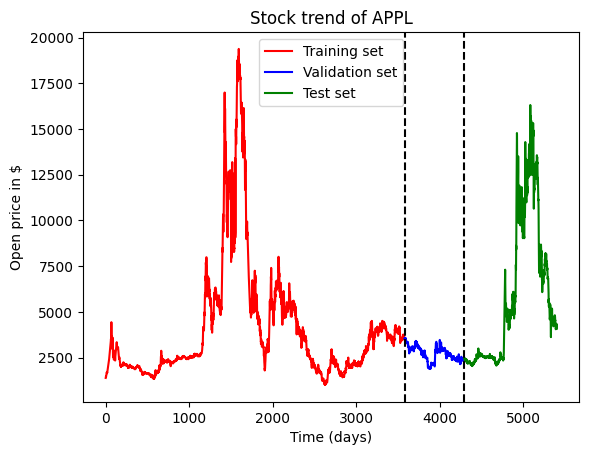

In [35]:
# Visualize the training, validation and test set
df_plot = df['Open']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Plot the subset splits
ax = df_plot.iloc[:size_train,1:2].plot(y=0, color='red', label='Training set')
df_plot.iloc[size_train:size_train+size_val,1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train+size_val:df_plot.shape[0],1:2].plot(y=0, color='green', label='Test set', ax=ax)
ax.set_title("Stock trend of APPL")
plt.xlabel('Time (days)')
plt.ylabel('Open price in $')
plt.axvline(x=size_train, color='black', linestyle='--')
plt.axvline(x=size_train+size_val, color='black', linestyle='--')
plt.show()

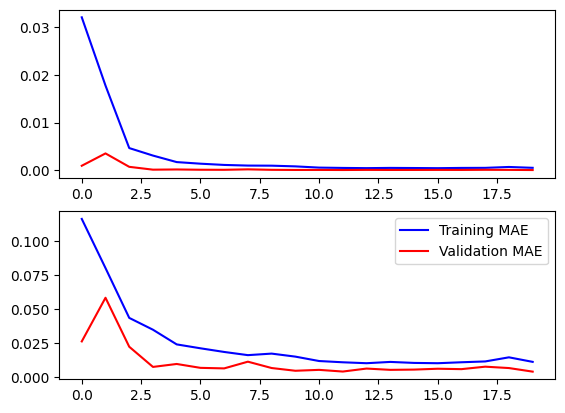

In [15]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['mae'],color='b',label='Training MAE')
ax[1].plot(history.history['val_mae'],color='r',label='Validation MAE')

plt.legend()

In [16]:
# Let us load a saved model and evaluate its performance on the test set
model_1d = tf.keras.models.load_model("/content/model_1d.keras")
result_1d = model_1d.evaluate(X_test_norm, y_test_norm) # If unspecified, batch_size will default to 32
# Show the model performance
print(model_1d.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
print("Loss and mae on the test set: loss = {}, mae = {}".format(result_1d[0],result_1d[1]))
# CONVO1D MODEL
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model_1d.predict(X_test_norm)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.4625e-04 - mae: 0.0091
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0006887138006277382, mae = 0.015307575464248657
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [17]:
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))
# Now, to denormalize the norm data back to the original scale:
y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

# Check the shapes
print("Shape of denormalized training set: ", y_pred_denorm.shape)

MSE on the test set:  0.0006887138146768355
Shape of denormalized training set:  (1074, 1)


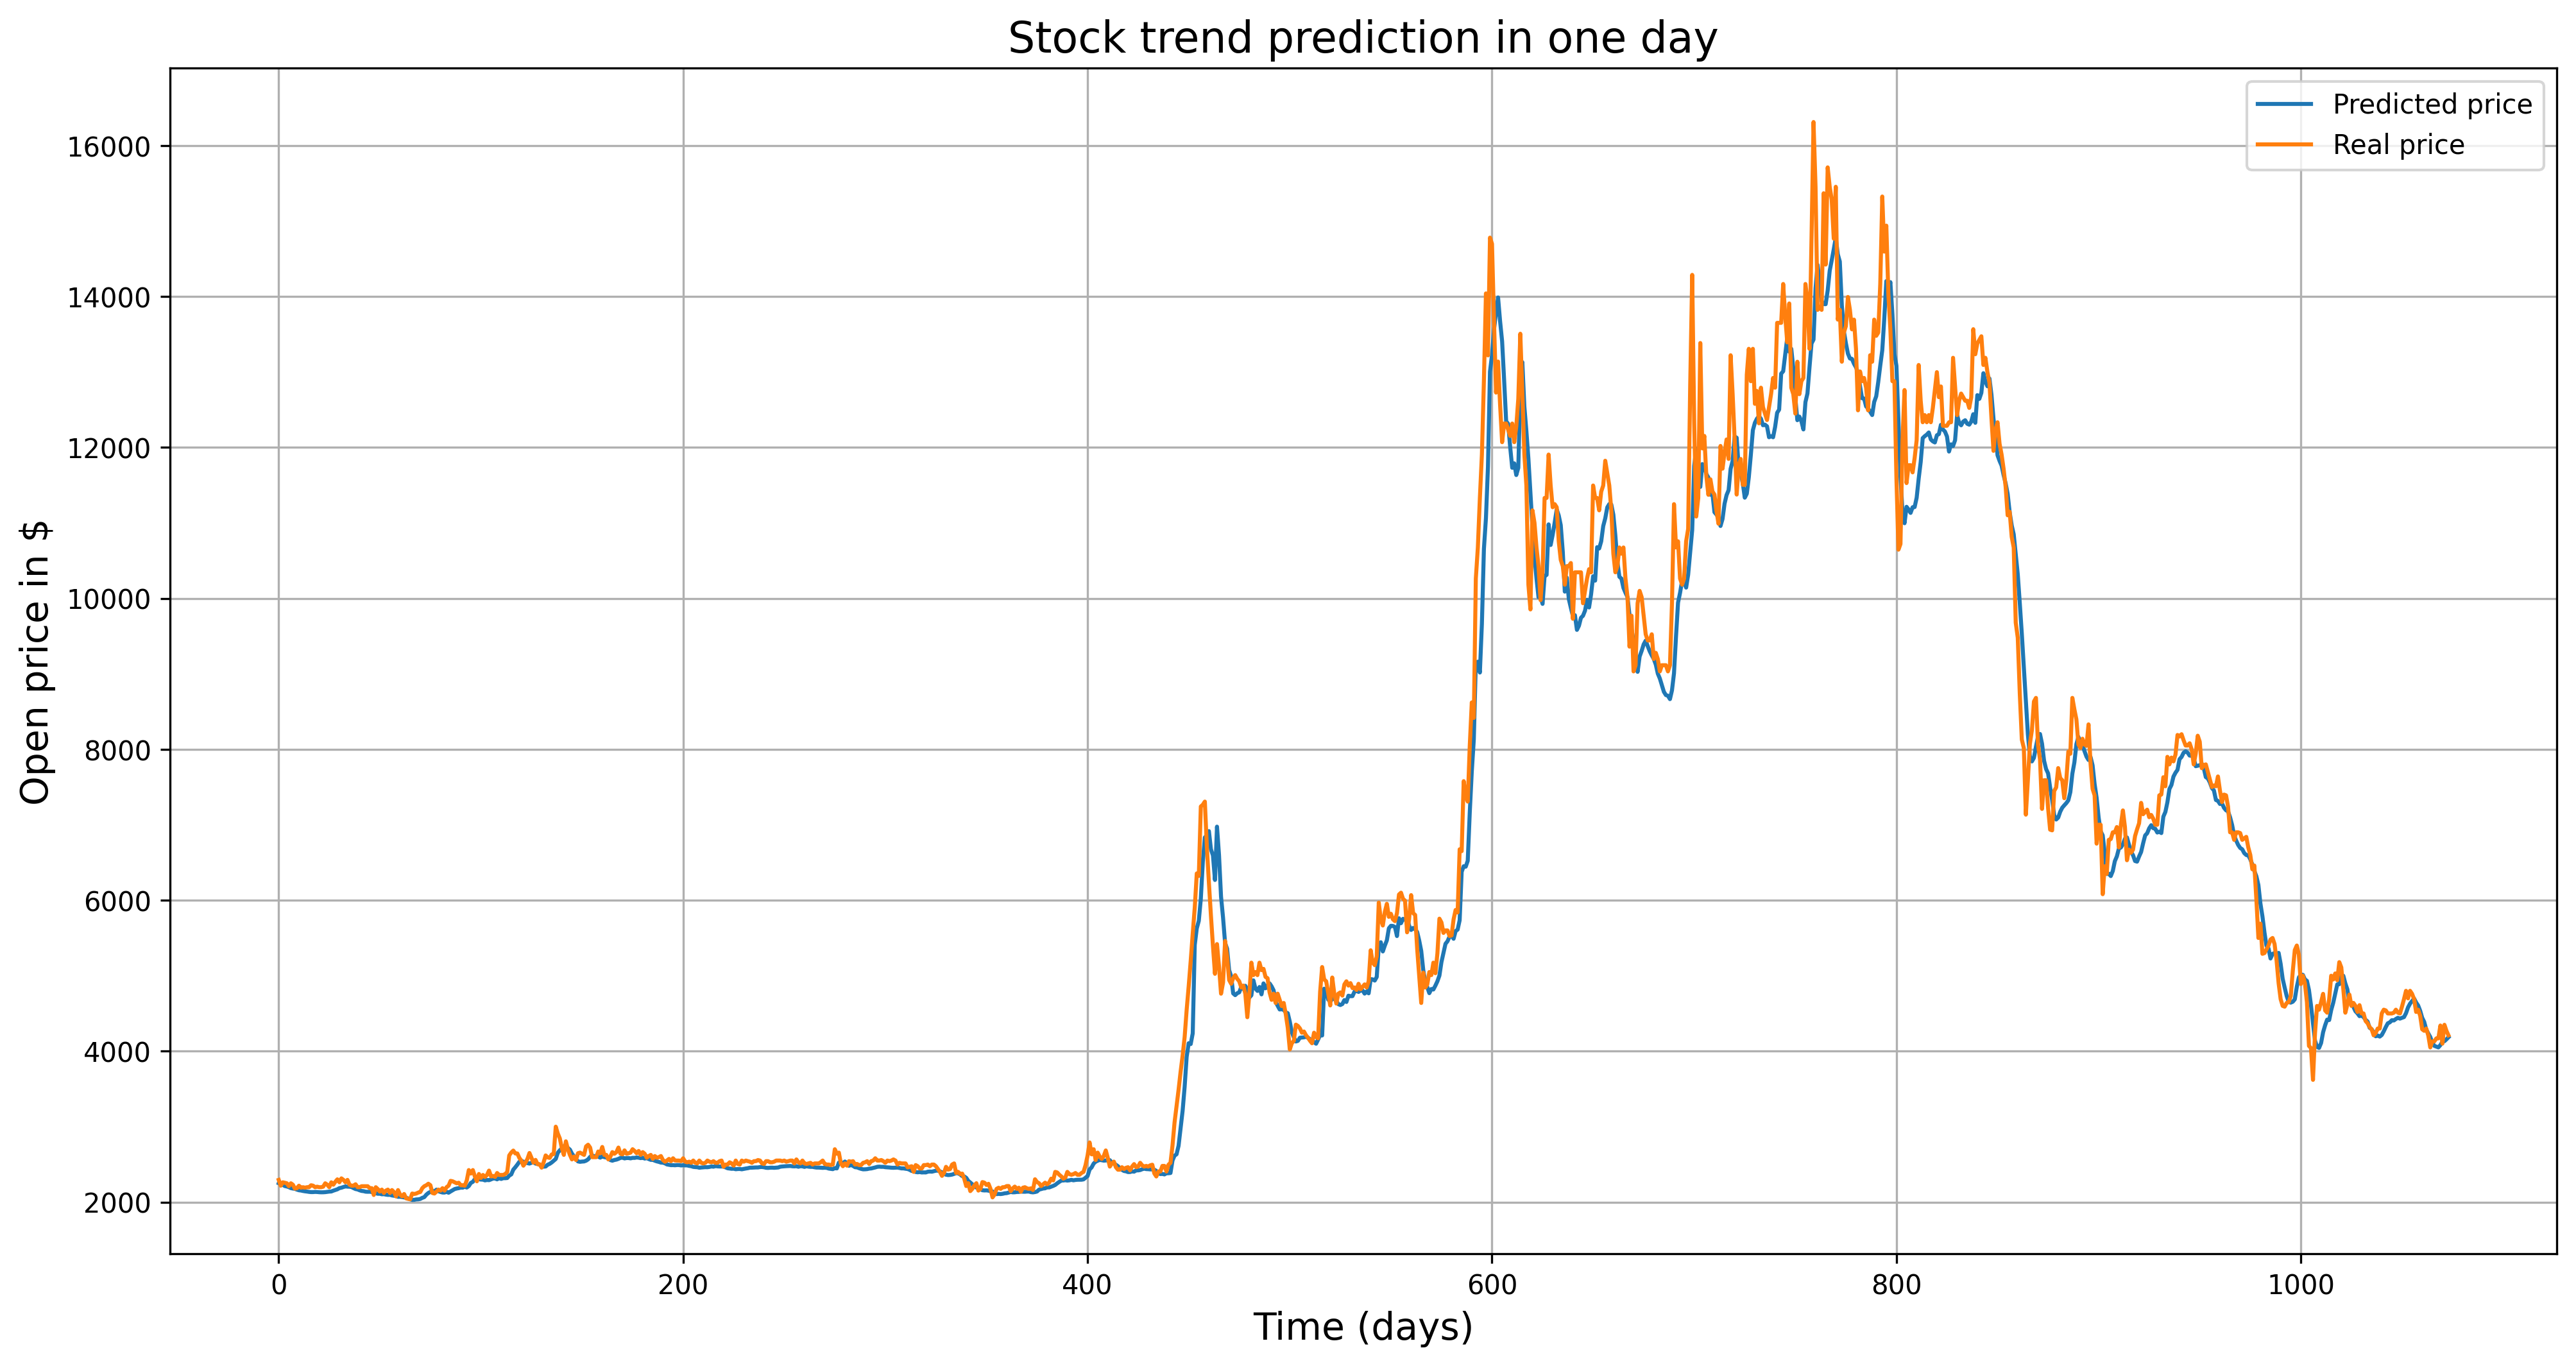

In [18]:
# Visualize predited stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_denorm, label='Predicted price')
plt.plot(y_test, label='Real price')
plt.title('Stock trend prediction in one day', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in $', fontsize=14)
plt.grid() # Add grid
plt.legend() # Add legend
plt.show()

In [19]:
time_steps = np.arange(0, 1)

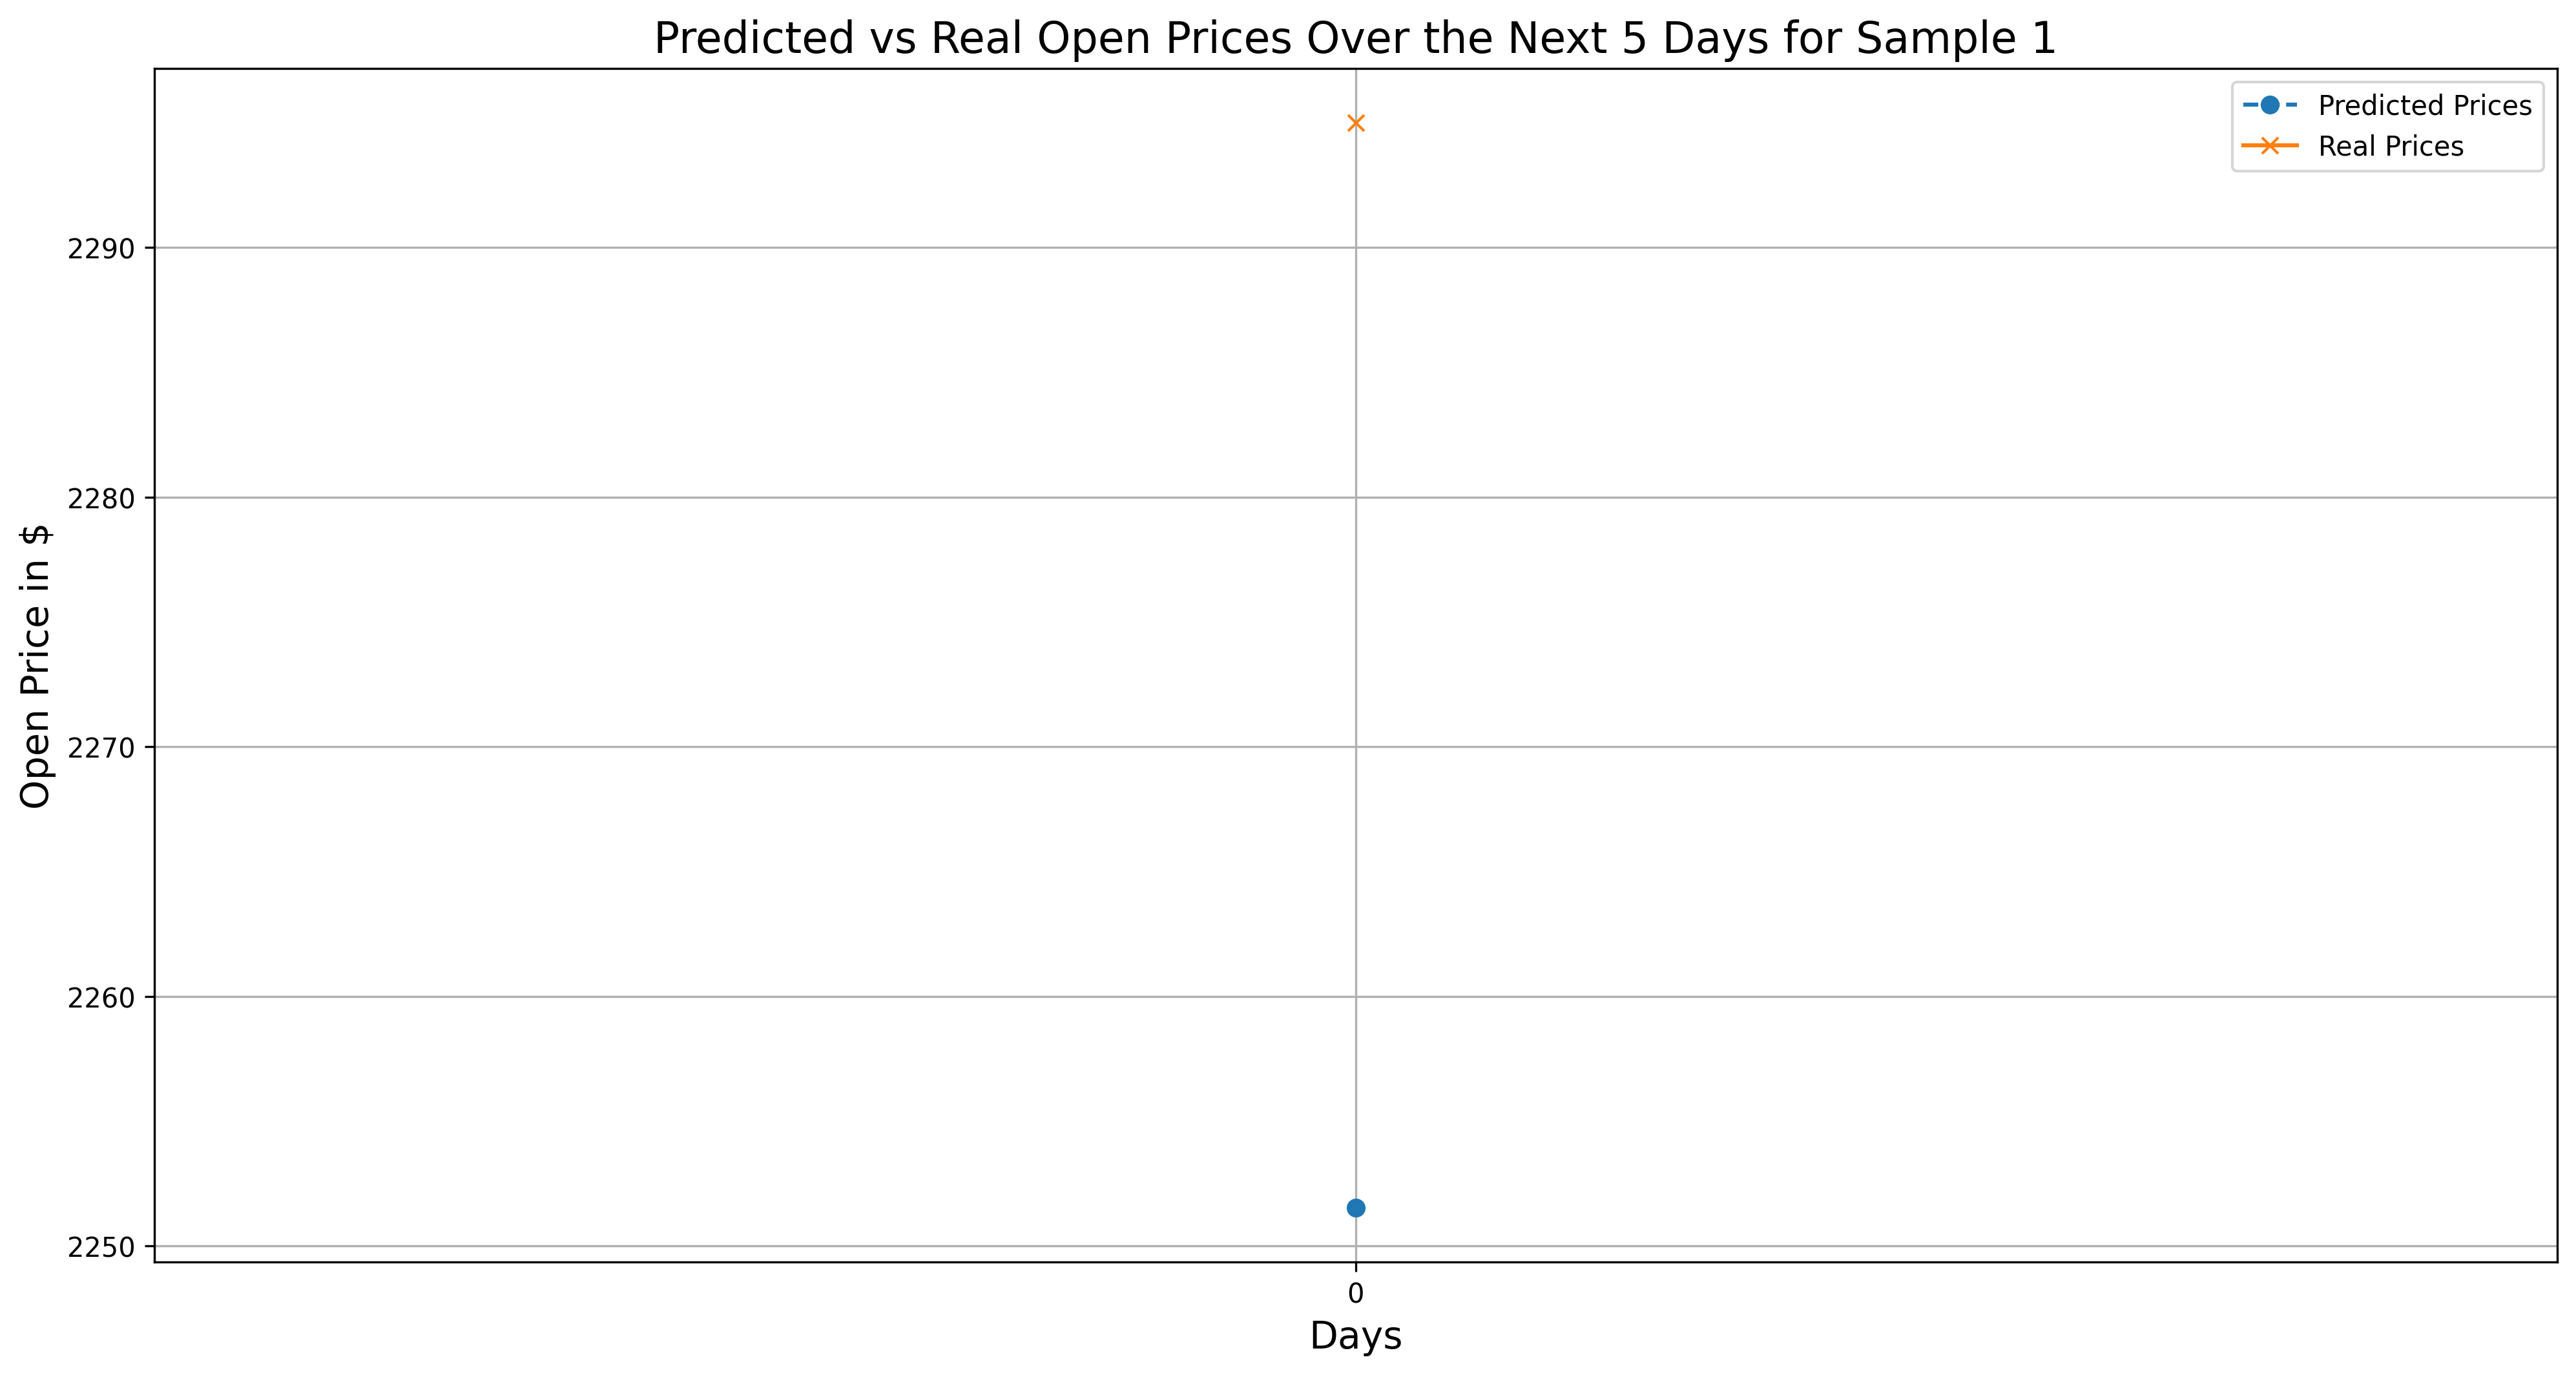

In [21]:
plt.figure(figsize=(16, 8), dpi=300)

# Plot for the first sample only
plt.plot(time_steps, y_pred_denorm[0], label='Predicted Prices', linestyle='--', marker='o')
plt.plot(time_steps, y_test[0], label='Real Prices', linestyle='-', marker='x')

# Add titles, labels, and legend
plt.title('Predicted vs Real Open Prices Over the Next 5 Days for Sample 1', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Open Price in $', fontsize=14)
plt.xticks(time_steps)  # Set x-ticks to represent days
plt.grid()  # Add grid
plt.legend()  # Add legend
plt.show()
